# Projeto de Machine Learning

### Giullber Valentim da Silva

## Bibliotecas utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
import shap

# configurações:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 35)
pd.set_option('display.width', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
%config InlineBackend.figure_format='retina'

## Introdução

Este trabalho em questão visa a aplicação de métodos estatísticos de classificação afim de prever se um certo cliente irá fechar ou não a sua conta em um determinado banco. Tal modelo, considerado como supervisionado, tentará classificar esses clientes a partir da variável alvo "_Encerrou_" que trará observações binárias onde:

> **1**: _Se o cliente encerrou a sua conta no banco;_ <br> 
> **0**: _Se o cliente não encerrou a sua conta no banco;_

A descrição das demais variáveis:

> **id_cliente**: IDs unicos para a identificação dos clientes  <br> 
> **Sobrenome**: Ultimo nome do cliente  <br> 
> **Pont_cred**: Pontuação de crédito do cliente  <br> 
> **País**: O país de onde o cliente pertence  <br> 
> **Gênero**: Gênero do cliente  <br> 
> **Idade**: A idade do cliente  <br> 
> **Posse**: Número de anos que o cliente esteve no banco  <br> 
> **Saldo**: Saldo bancário do cliente  <br> 
> **Num_Produto**: Número de produtos bancários utilizado pelo cliente  <br> 
> **Tem_cart_cred**: Se o cliente possui um cartão de crédito com o banco ou não  <br> 
> **Cli_ativo**: Se o cliente é um membro ativo no banco ou não  <br> 
> **Salario_est**: Salário estimado do cliente em dólares  <br> 
> **Encerrou**: Se o cliente encerrou ou não a sua conta 

Essas situações onde um cliente deixa de consumir certo produtos ou até mesmo encerra a sua conta bancária em um banco, a métrica que calcula esta taxa de cancelamento é conhecido como "_Churn_", ou ainda "_Chunr rate_", onde é feita uma proporção com base no número de clientes que encerram a suas contas em relação ao número de clientes no ínicio do mês.


## Metodologia

Para a aplicação em Machine Learning será necessário separa os dados em bases de **Treino** e **Teste**, onde na base treino serão aplicadas técnicas de estatística descritiva afim de entedermos alguns compartamento dos dados em relação a variável alvo. 

Assim também, para evitar problemas de clasificação com um viés maior para um determinada categoria, foi aplicada a técnica de balanceamento denomidade de **Undersampling**, onde basicamente a categoria com a maior quantidade será diminuida através de processos de reamostragens até se equipará com a categoria com menor quantidade de observações.

Foram aplicados três modelos de classificação, sendo comparados entre si e escolhido aquele que obteve o melhor desempenho e assim sendo escolhido e realizado um aprimoramento através de seus hiperparâmetros utilizando a função do "_Gridsearch_". Os modelos aplicados foram:

> **Naive Bayes**: Com a premissa de que as variáveis atendam o pressuposto de independência, este modelo fará uma classificação probabilística das observações e classificando-as em classes;  <br> 
> **Random Forest**: Este modelo cria de forma aleatória diversas árvores de decisão, criando uma estrutura semelhantre a sum fluxograma, combinando diversos resultado até chegar em um único resultado;  <br> 
> **K-nearest neighbors**: realiza a classificação com base em amostras ditas vizinhas de uma base de treino;  <br> 
> **XGBoost**: Assim como **Random Forest**, é baseado em árvore de decisão e utilizará uma estrutura de **Gradient boosting**;

## Importação dos dados

In [2]:
df_churn = pd.read_csv("Dados\\Churn_Modelling.csv")

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df_churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure     Balance  \
0          1    15634602  Hargrave          619    France  Female   42       2      0.0000   
1          2    15647311      Hill          608     Spain  Female   41       1  83807.8600   
2          3    15619304      Onio          502    France  Female   42       8 159660.8000   
3          4    15701354      Boni          699    France  Female   39       1      0.0000   
4          5    15737888  Mitchell          850     Spain  Female   43       2 125510.8200   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1      101348.8800       1  
1              1          0               1      112542.5800       0  
2              3          1               0      113931.5700       1  
3              2          0               0       93826.6300       0  
4              1          1               1       79084.1000       0

## Ajustes na base de dados

*Traduzindo as colunas da base de dados*

In [6]:
nomes = ["linhaNum","Id_Cliente","Sobrenome","Pont_Credito",
          "País","Gênero","Idade","Posse","Saldo","Num_Produto",
          "Tem_cart_cred","Cli_ativo","Salario_est","Encerrou"]

df_churn.columns = nomes

df_churn.columns

Index(['linhaNum', 'Id_Cliente', 'Sobrenome', 'Pont_Credito', 'País', 'Gênero', 'Idade', 'Posse',
       'Saldo', 'Num_Produto', 'Tem_cart_cred', 'Cli_ativo', 'Salario_est', 'Encerrou'],
      dtype='object')

In [7]:
df_churn = df_churn.drop(['linhaNum'], axis = 1)

> Removendo colunas da base de dados.

In [8]:
df_churn.drop(["Id_Cliente","Sobrenome"], axis = 1, inplace = True)
df_churn.head(10)

Pont_Credito     País  Gênero  Idade  Posse       Saldo  Num_Produto  Tem_cart_cred  Cli_ativo  \
0           619   France  Female     42      2      0.0000            1              1          1   
1           608    Spain  Female     41      1  83807.8600            1              0          1   
2           502   France  Female     42      8 159660.8000            3              1          0   
3           699   France  Female     39      1      0.0000            2              0          0   
4           850    Spain  Female     43      2 125510.8200            1              1          1   
5           645    Spain    Male     44      8 113755.7800            2              1          0   
6           822   France    Male     50      7      0.0000            2              1          1   
7           376  Germany  Female     29      4 115046.7400            4              1          0   
8           501   France    Male     44      4 142051.0700            2              0          1   
9           684   France    Male     27      2 134603.8800            1              1          1   

   Salario_est  Encerrou  
0  101348.8800         1  
1  112542.5800         0  
2  113931.5700         1  
3   93826.6300         0  
4   79084.1000         0  
5  149756.7100         1  
6   10062.8000         0  
7  119346.8800         1  
8   74940.5000         0  
9   71725.7300         0

### Verificando a necessidade de balanceamento

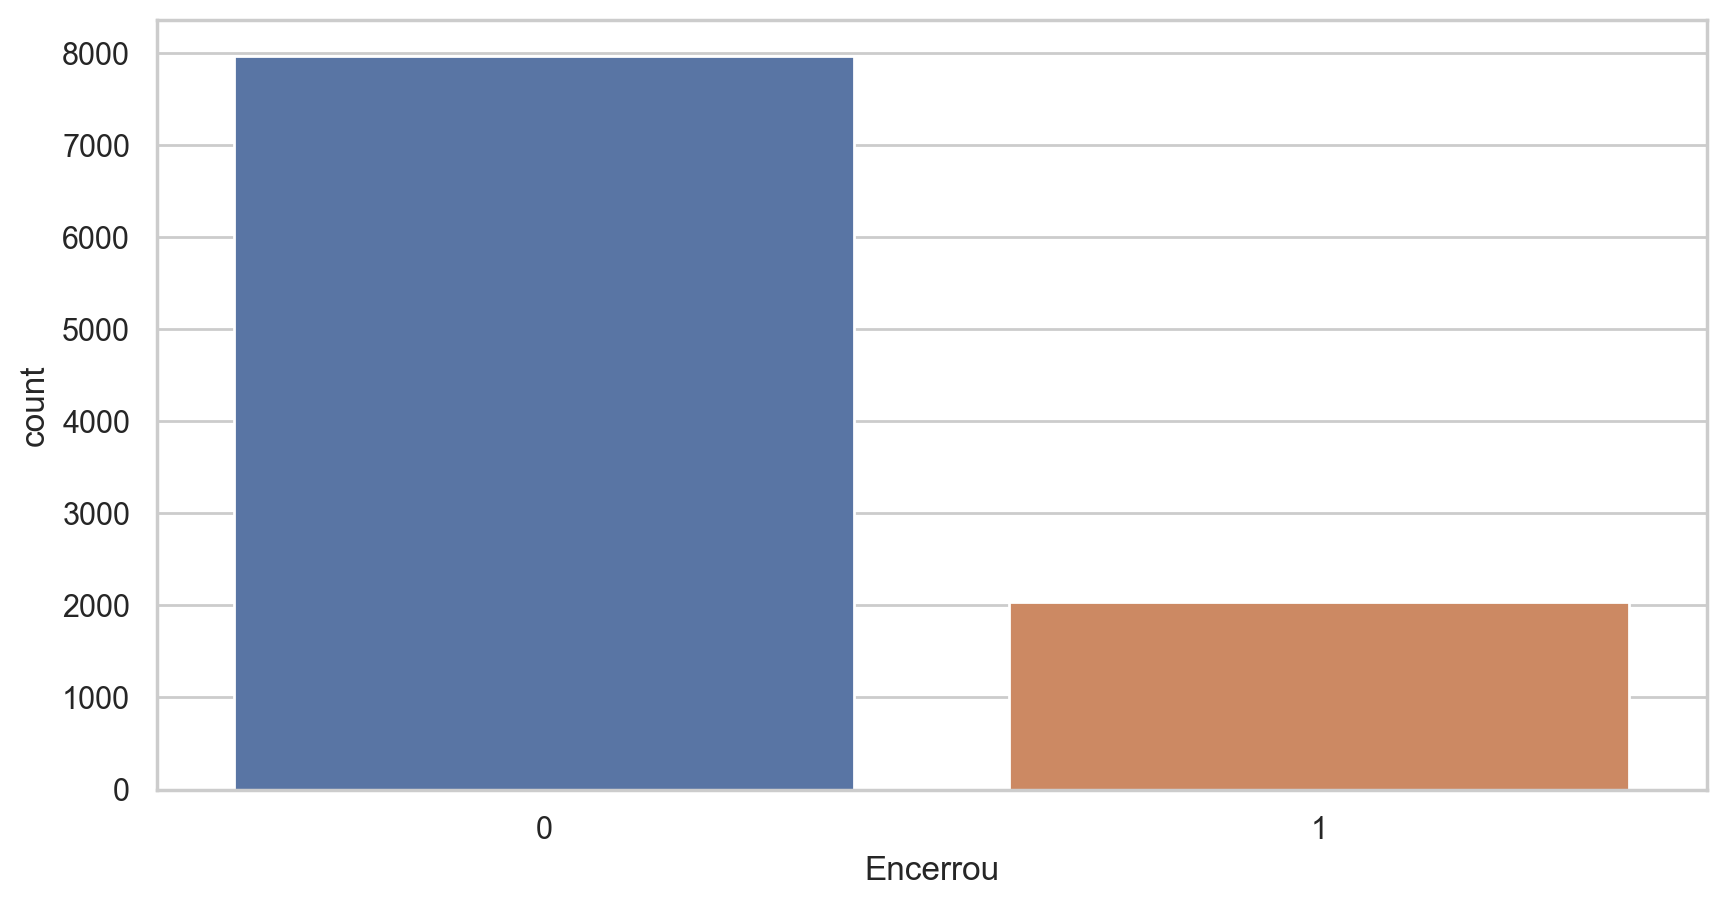

In [11]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (10,5))

sns.countplot(df_churn, x = "Encerrou")

plt.show()

### Balanceando usando o método de upsampling

In [12]:
mask = df_churn.Encerrou == 1

df_encerrou = df_churn[mask]
df_continua = df_churn[~mask]

df_upsample = resample(
    df_continua,
    replace =True,
    n_samples = len(df_encerrou),
    random_state = 42
)

In [13]:
df2_churn = pd.concat([df_encerrou,df_upsample])

df2_churn.Encerrou.value_counts()

1    2037
0    2037
Name: Encerrou, dtype: int64

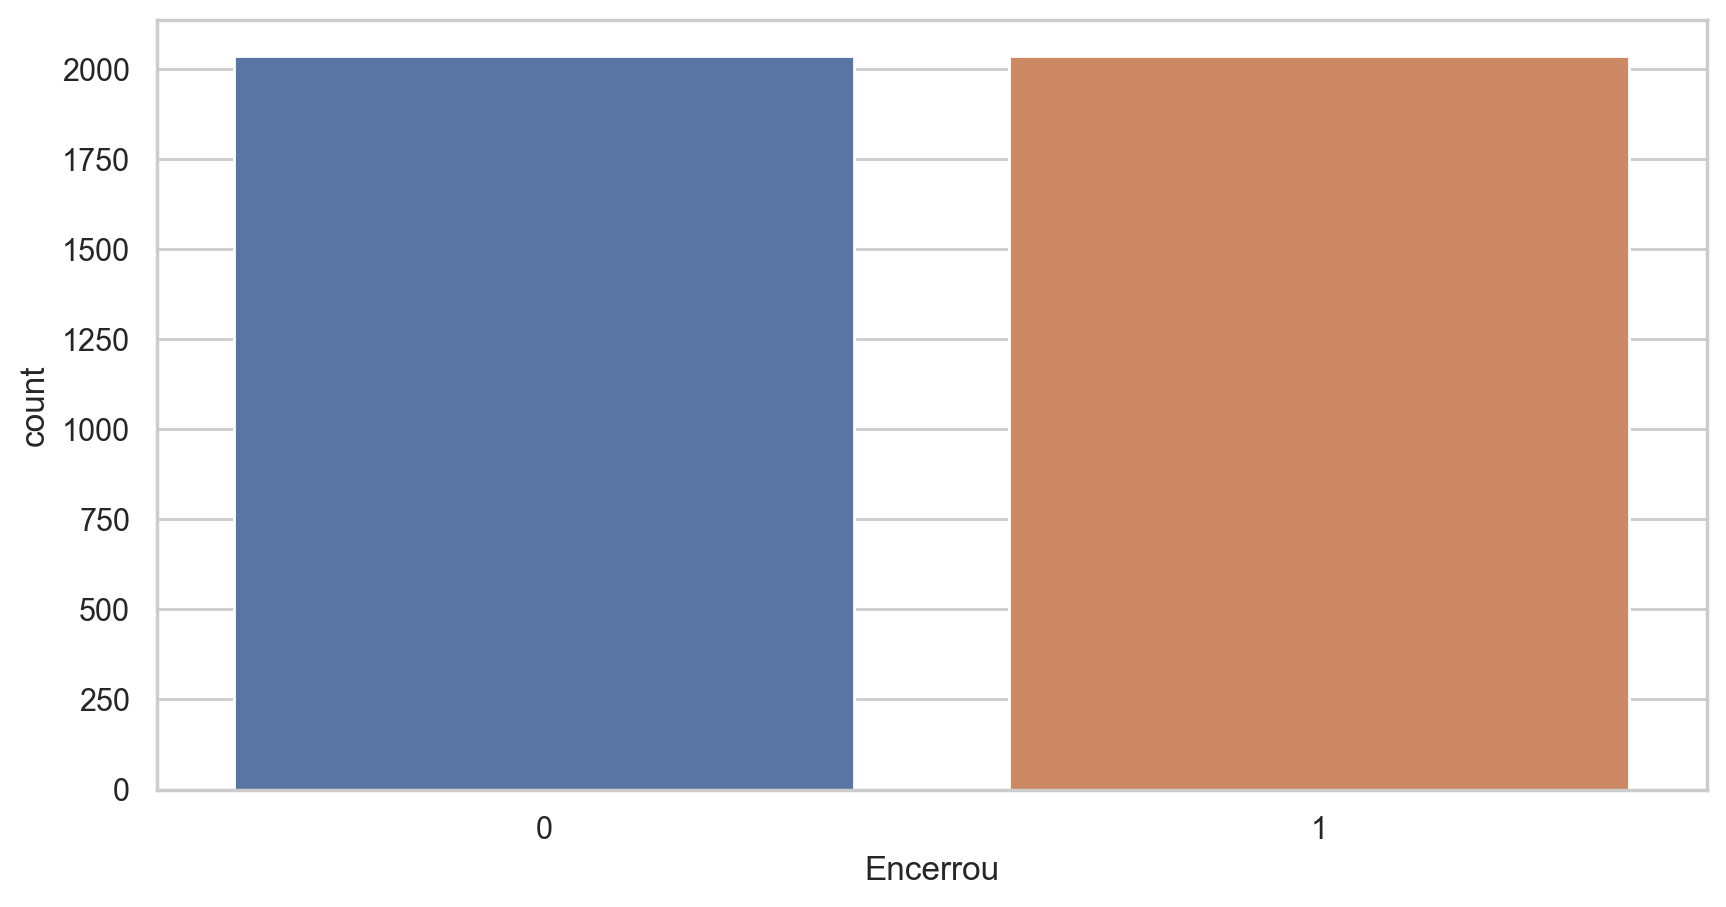

In [14]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (10,5))

sns.countplot(df2_churn, x = "Encerrou")

plt.show()

## Divisão da base treino e teste

In [15]:
churn_base_treino,churn_base_teste = train_test_split(df2_churn, test_size = 0.30, random_state = 0, shuffle = True, stratify=df2_churn["Encerrou"])

## Análise exploratória 

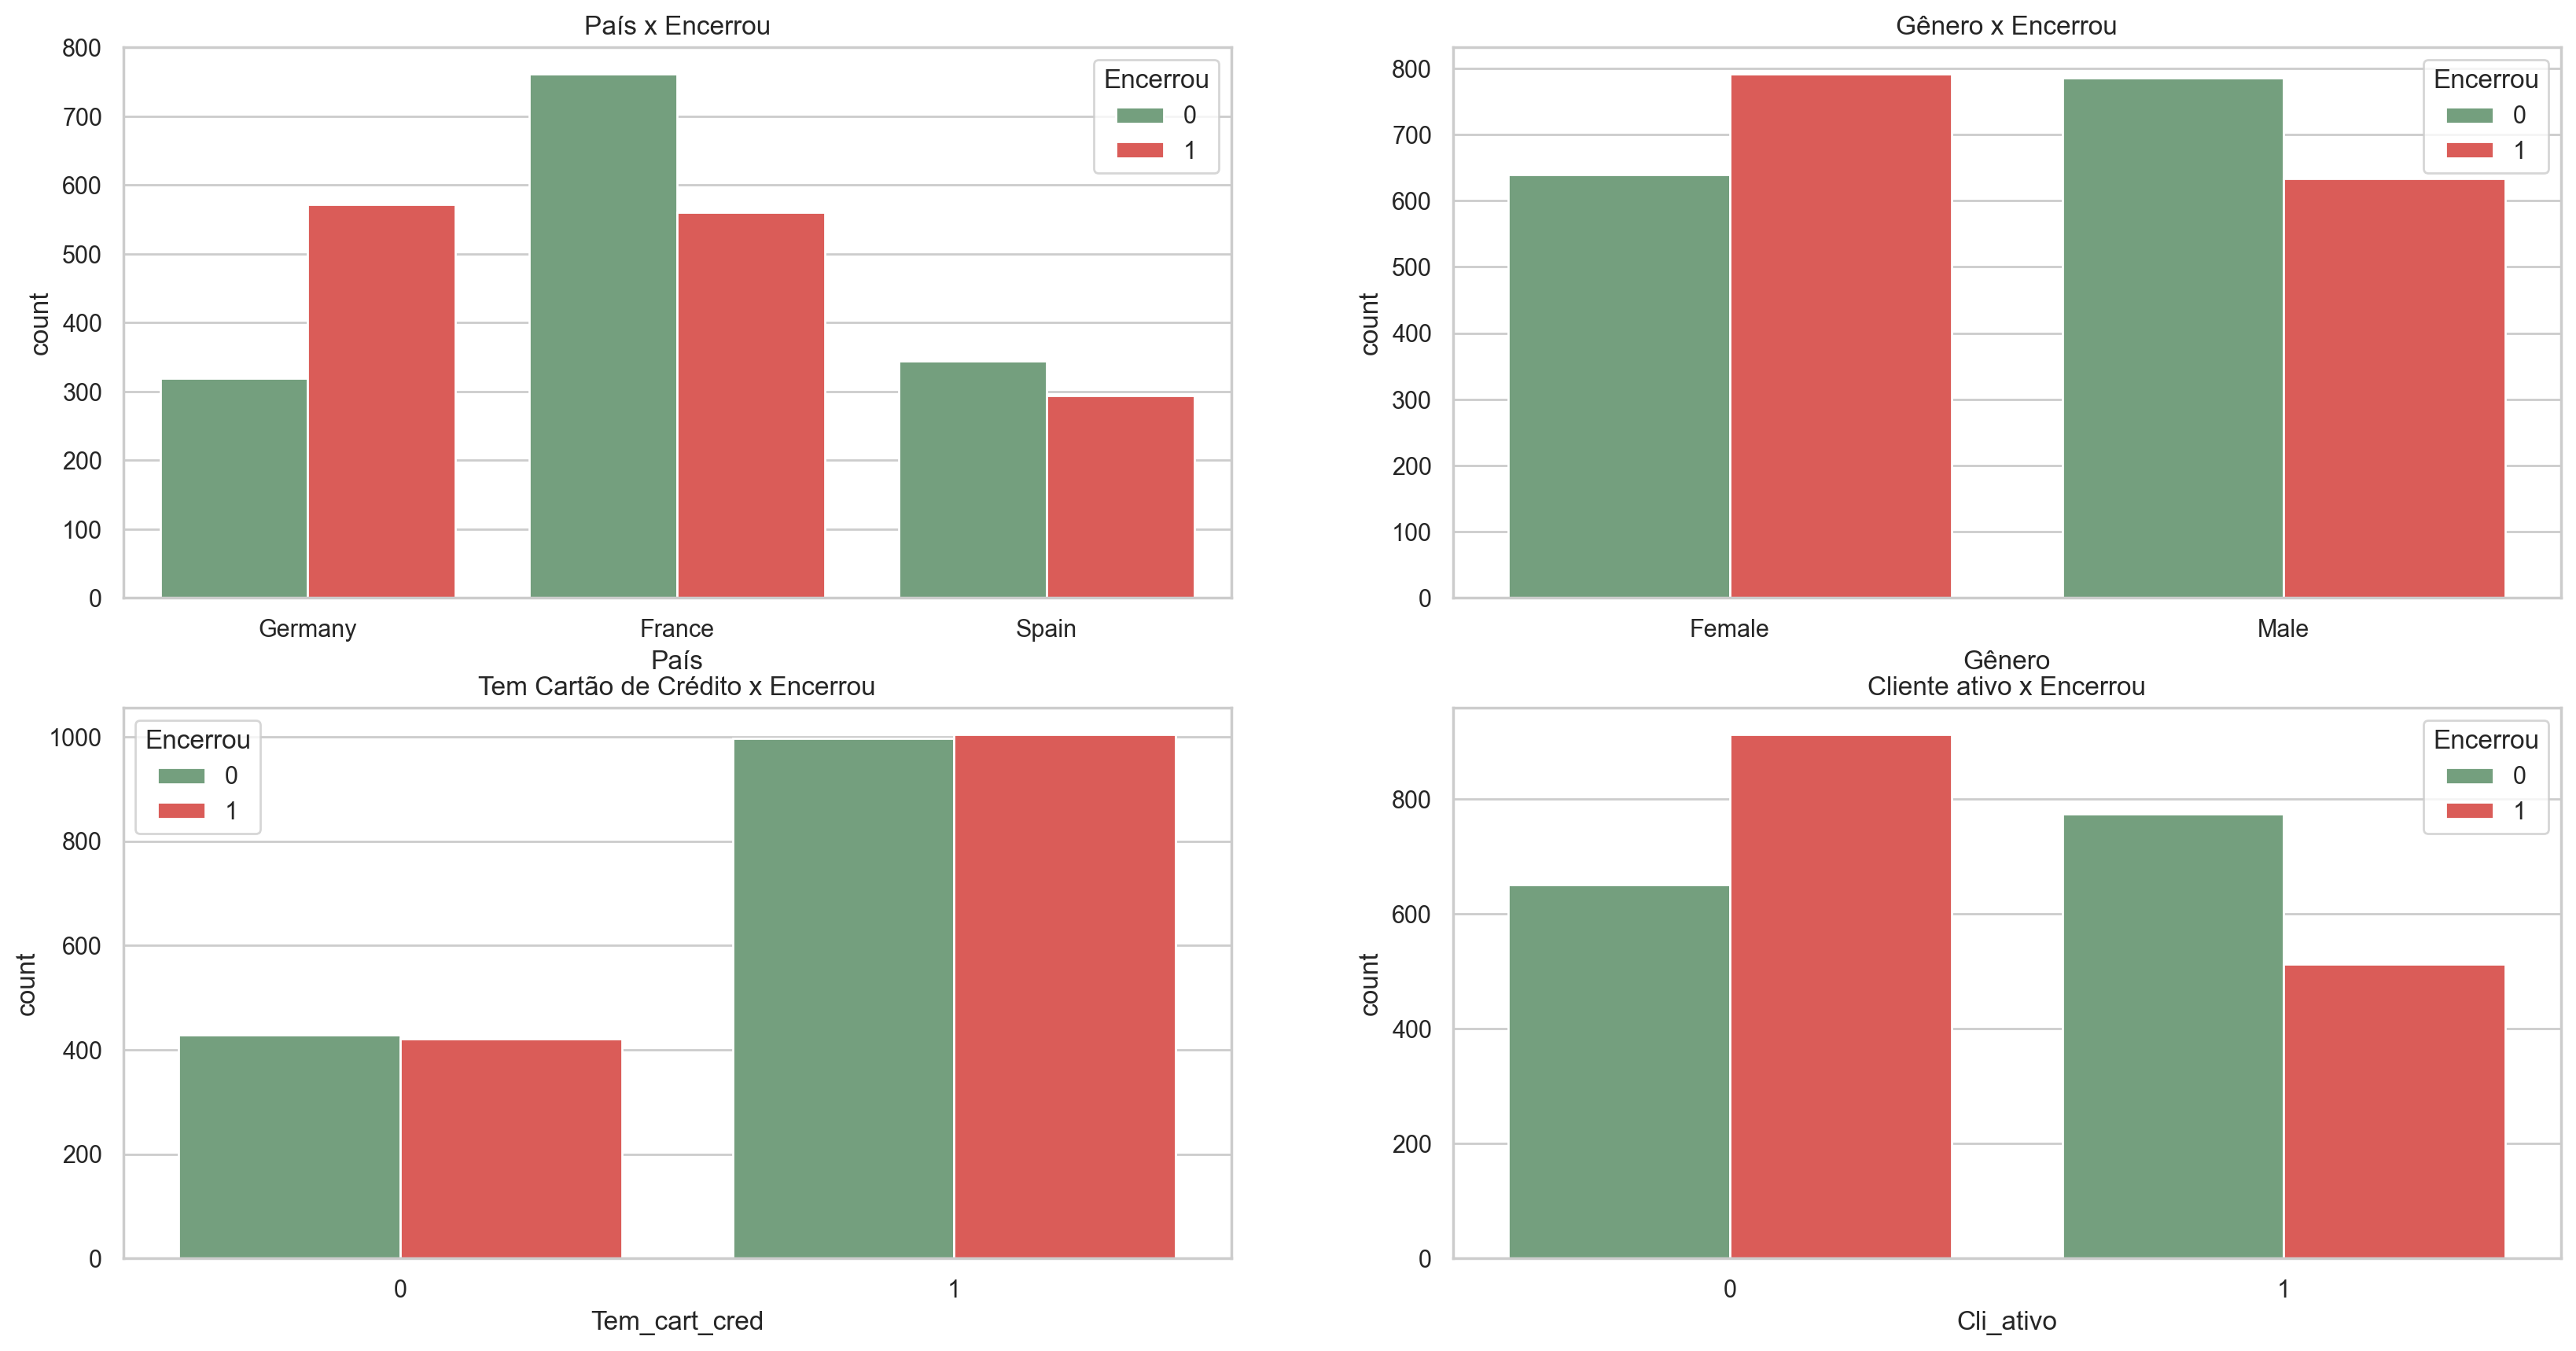

In [ ]:
paleta = ["#6da67a","#f04842"]
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(2, 2, figsize=(20, 10))

plot1 = sns.countplot(churn_base_treino, x = "País", hue = churn_base_treino.Encerrou, palette=paleta, ax=ax[0,0])
ax[0,0].set_title("País x Encerrou")

plot2 = sns.countplot(churn_base_treino, x = "Gênero", hue = churn_base_treino.Encerrou, palette=paleta, ax=ax[0,1])
ax[0,1].set_title("Gênero x Encerrou")

plot3 = sns.countplot(churn_base_treino, x = "Tem_cart_cred", hue = churn_base_treino.Encerrou, palette=paleta, ax=ax[1,0])
ax[1,0].set_title("Tem Cartão de Crédito x Encerrou")

plot4 = sns.countplot(churn_base_treino, x = "Cli_ativo", hue = churn_base_treino.Encerrou, palette=paleta, ax=ax[1,1])
ax[1,1].set_title("Cliente ativo x Encerrou")

plt.show()

In [19]:
def calc_sturg(coluna_name):
    n = df_churn[coluna_name].shape[0]
    k = 1 + (10/3) * np.log10(n)
    k = int(k.round(0))
    return k

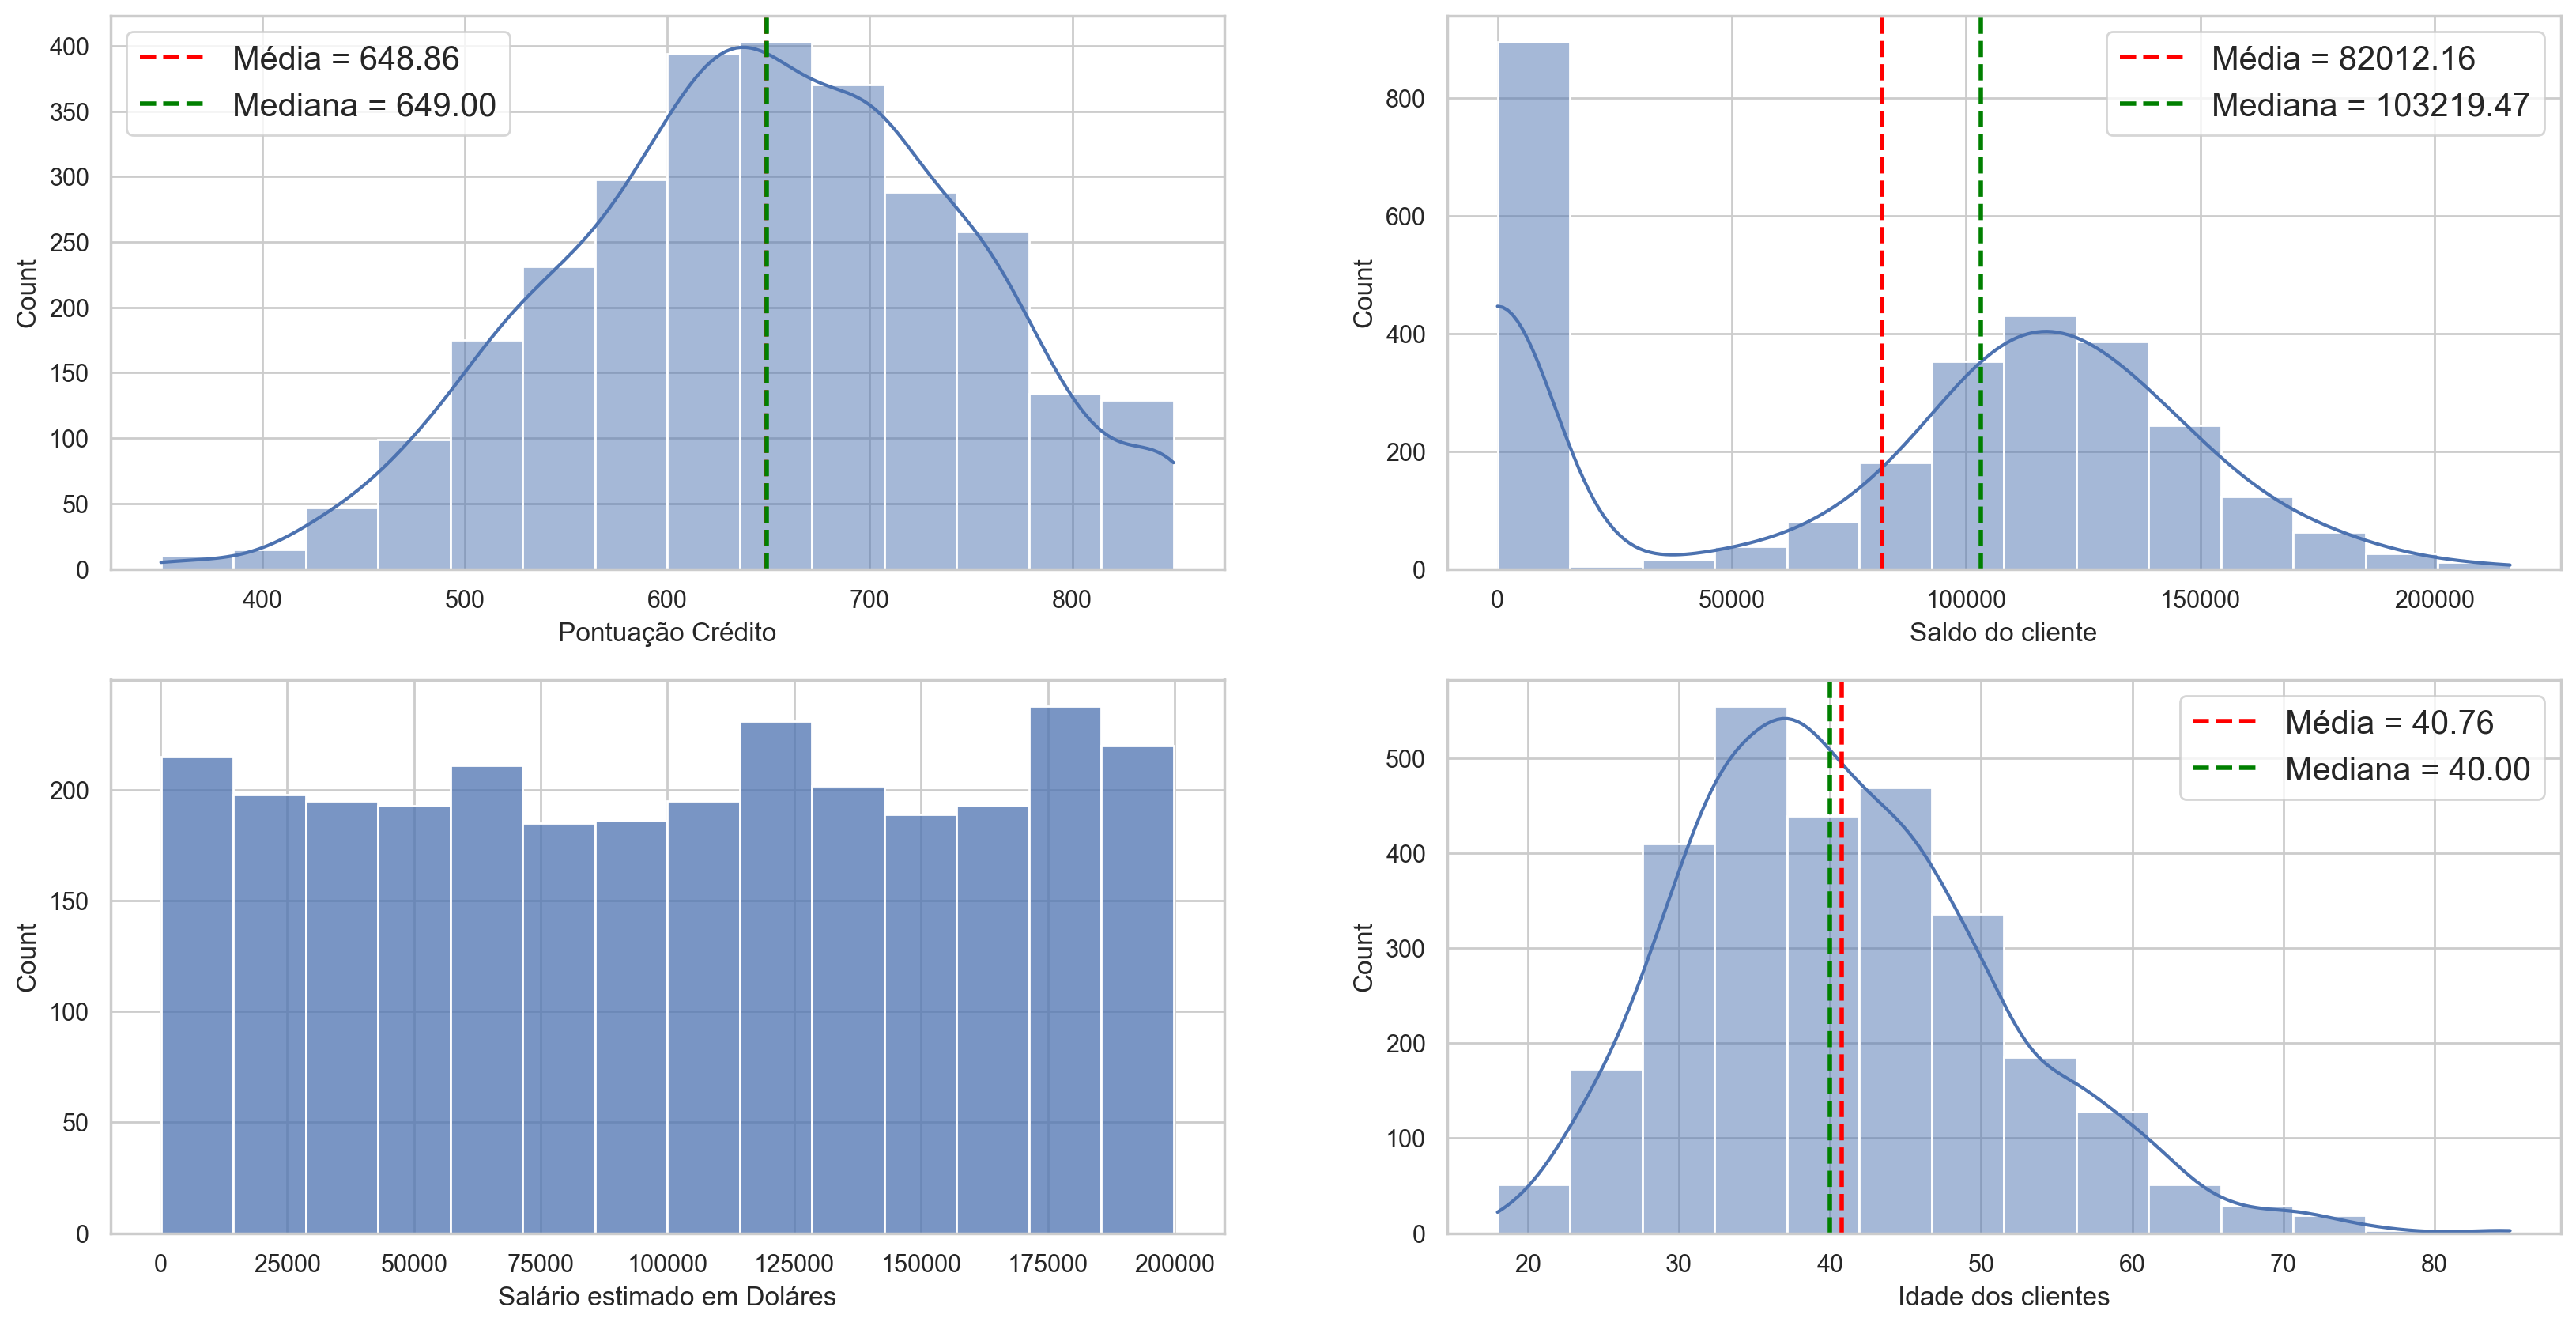

In [30]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(2, 2, figsize=(20, 10))

#
plot1 = sns.histplot(churn_base_treino["Pont_Credito"], kde = True, bins = calc_sturg("Pont_Credito"), ax=ax[0,0])
ax[0,0].set_xlabel("Pontuação Crédito")
ax[0,0].axvline( x = churn_base_treino["Pont_Credito"].mean(), color='red', linestyle='dashed', linewidth=2, label='Média = %.2f'%churn_base_treino["Pont_Credito"].mean())
ax[0,0].axvline( x = churn_base_treino["Pont_Credito"].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana = %.2f'%churn_base_treino["Pont_Credito"].median())
ax[0,0].legend(loc='upper left', fontsize  = 15) 

#
plot2 = sns.histplot(churn_base_treino["Saldo"], kde = True, bins = calc_sturg("Saldo"), ax=ax[0,1])
ax[0,1].set_xlabel("Saldo do cliente")
ax[0,1].axvline( x = churn_base_treino["Saldo"].mean(), color='red', linestyle='dashed', linewidth=2, label='Média = %.2f'%churn_base_treino["Saldo"].mean())
ax[0,1].axvline( x = churn_base_treino["Saldo"].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana = %.2f'%churn_base_treino["Saldo"].median())
ax[0,1].legend(loc='upper right', fontsize  = 15) 

#
plot3 = sns.histplot(churn_base_treino["Salario_est"], kde = False, bins = calc_sturg("Salario_est"), ax=ax[1,0])
ax[1,0].set_xlabel("Salário estimado em Doláres")


#
plot4 = sns.histplot(churn_base_treino["Idade"], kde = True, bins = calc_sturg("Idade"), ax=ax[1,1])
ax[1,1].set_xlabel("Idade dos clientes")
ax[1,1].axvline( x = churn_base_treino["Idade"].mean(), color='red', linestyle='dashed', linewidth=2, label='Média = %.2f'%churn_base_treino["Idade"].mean())
ax[1,1].axvline( x = churn_base_treino["Idade"].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana = %.2f'%churn_base_treino["Idade"].median())
ax[1,1].legend(loc='upper right', fontsize  = 15) 

plt.show()

In [16]:
#### Resetando o index para o plot a seguir
churn_base_treino = churn_base_treino.reset_index().drop(['index'], axis = 1)

In [17]:
churn_base_treino.head()

Pont_Credito     País  Gênero  Idade  Posse       Saldo  Num_Produto  Tem_cart_cred  Cli_ativo  \
0           807  Germany  Female     31      1 141069.1800            3              1          1   
1           689   France    Male     47      1  93871.9500            3              1          0   
2           850  Germany    Male     30      5 123210.5600            2              1          1   
3           563    Spain  Female     42      6  99056.2200            2              1          0   
4           524    Spain  Female     64      5      0.0000            1              1          0   

   Salario_est  Encerrou  
0  194257.1100         0  
1  156878.4200         1  
2  102180.2700         0  
3  154347.9500         1  
4  136079.6400         1

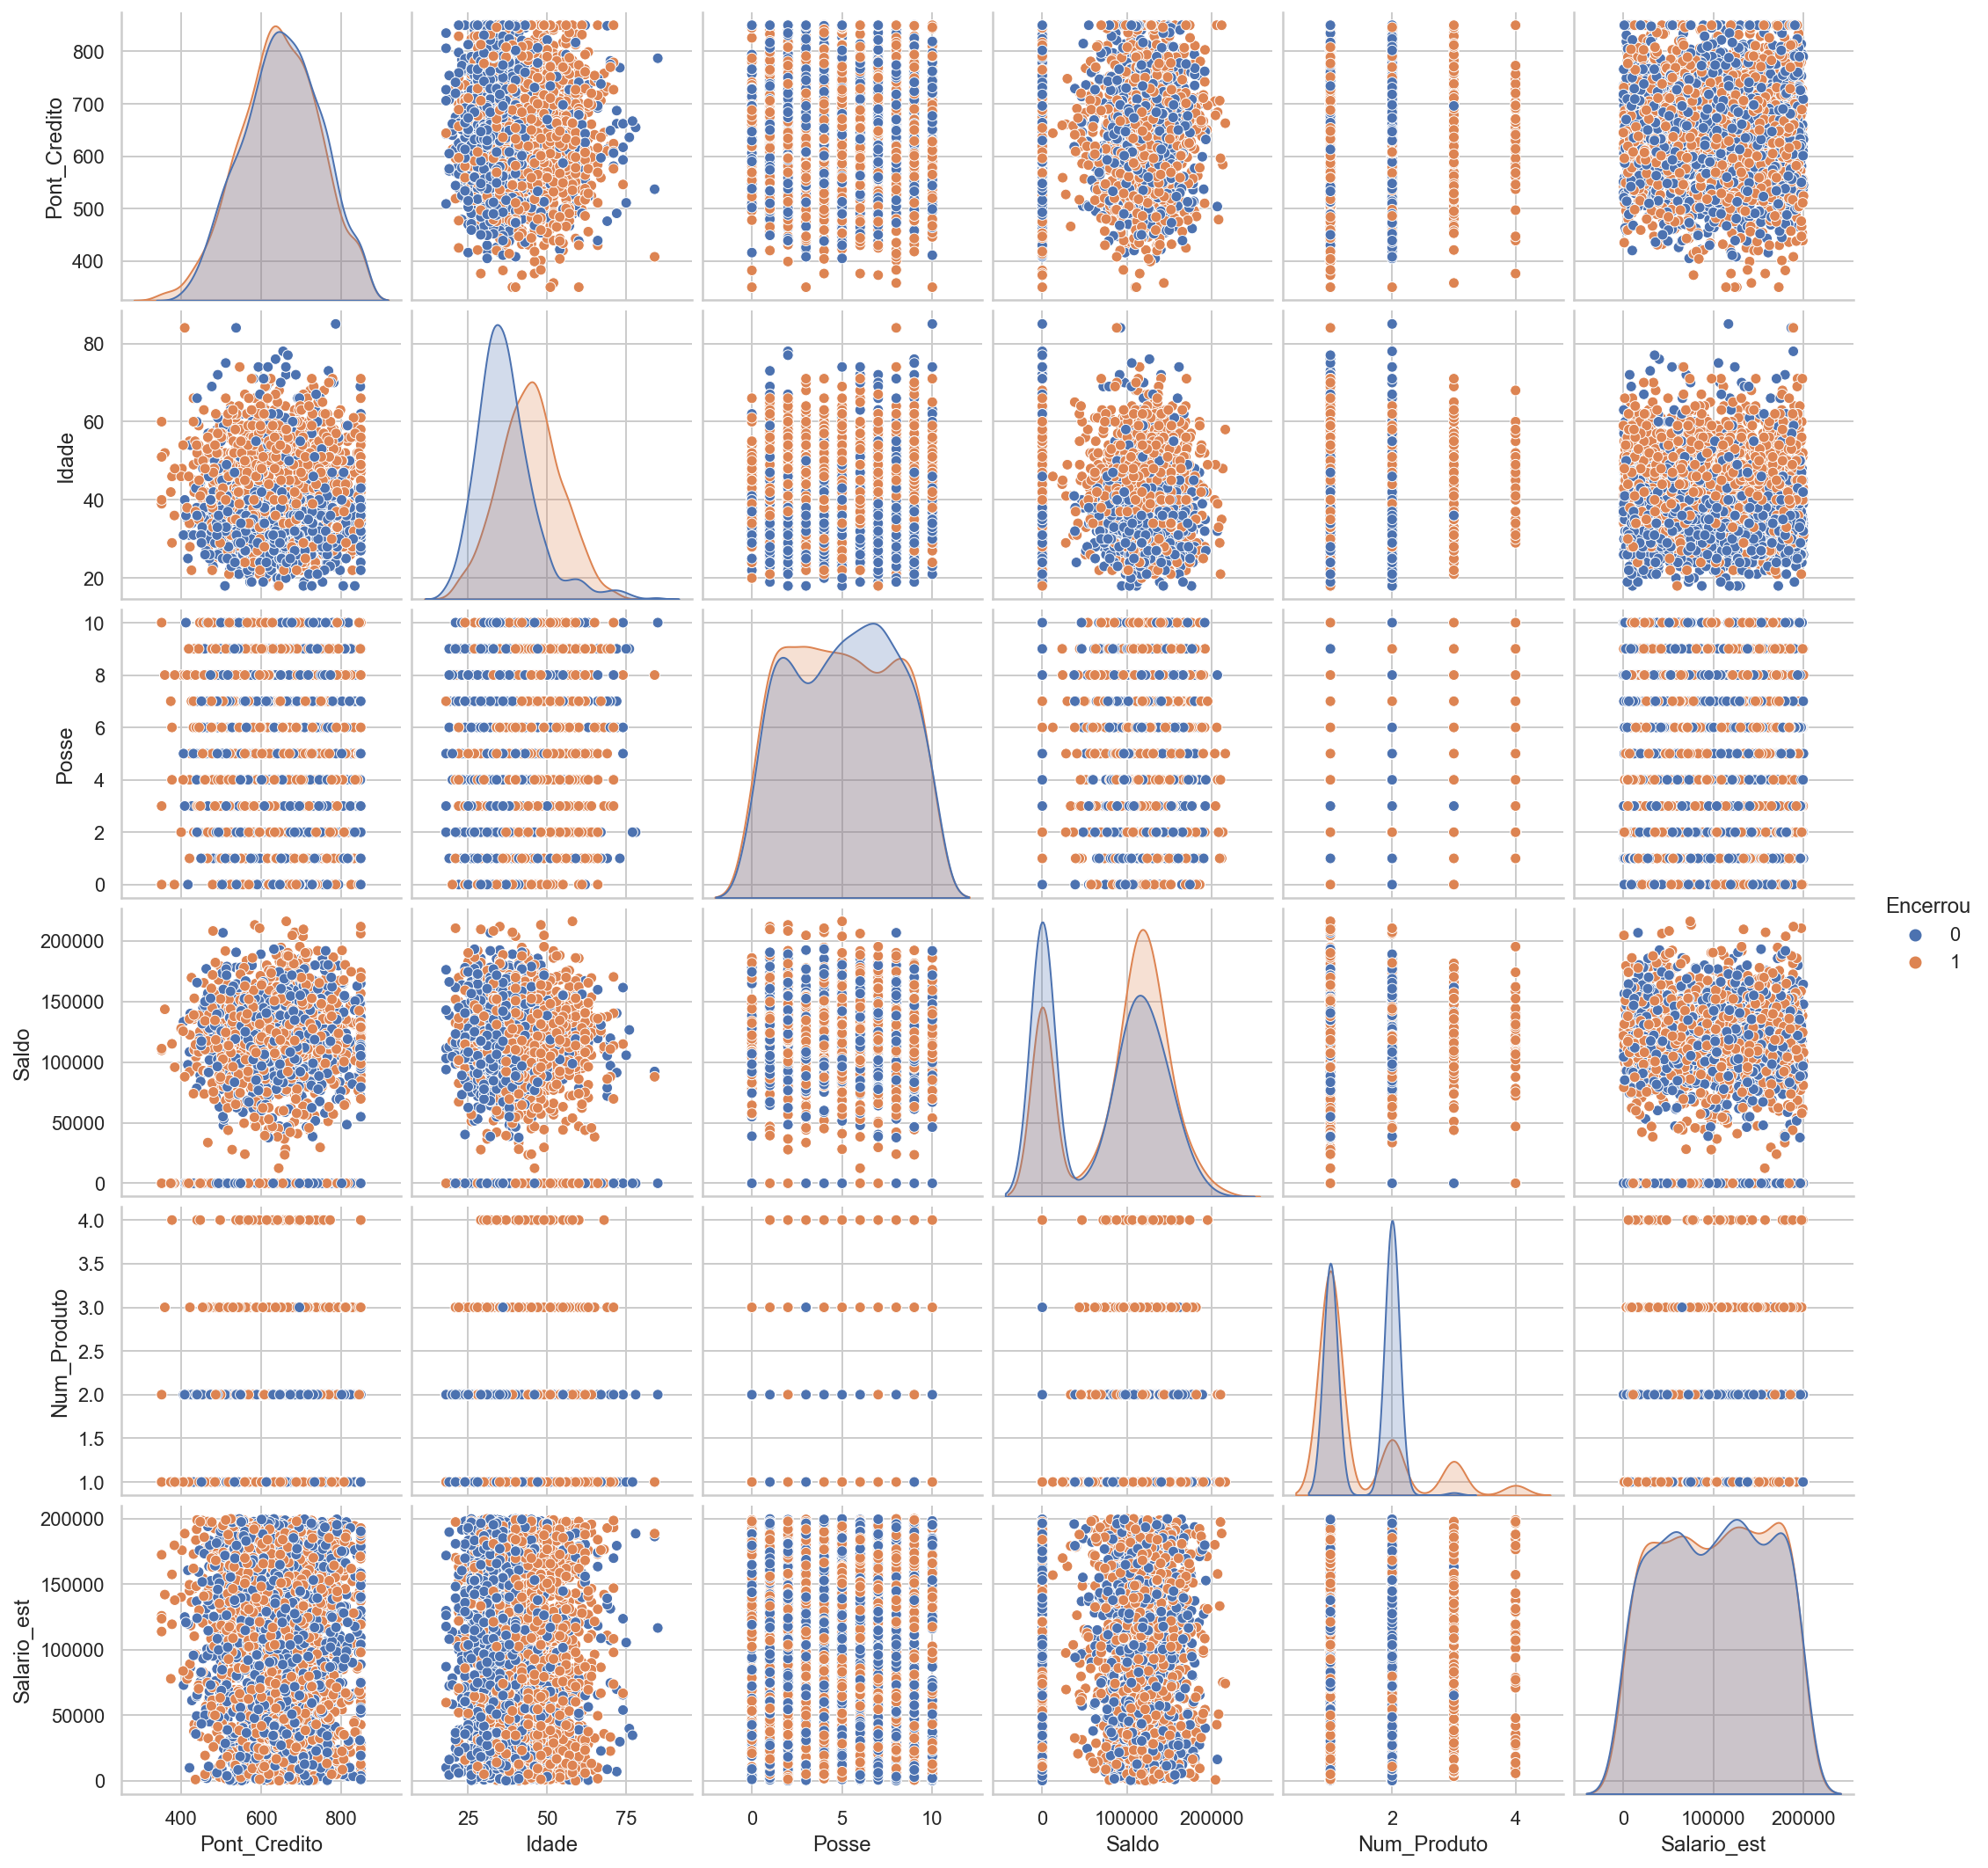

In [18]:
sns.pairplot(churn_base_treino[["Pont_Credito","Idade","Posse","Saldo","Num_Produto","Salario_est","Encerrou"]], hue="Encerrou")

plt.show()

### Correlação

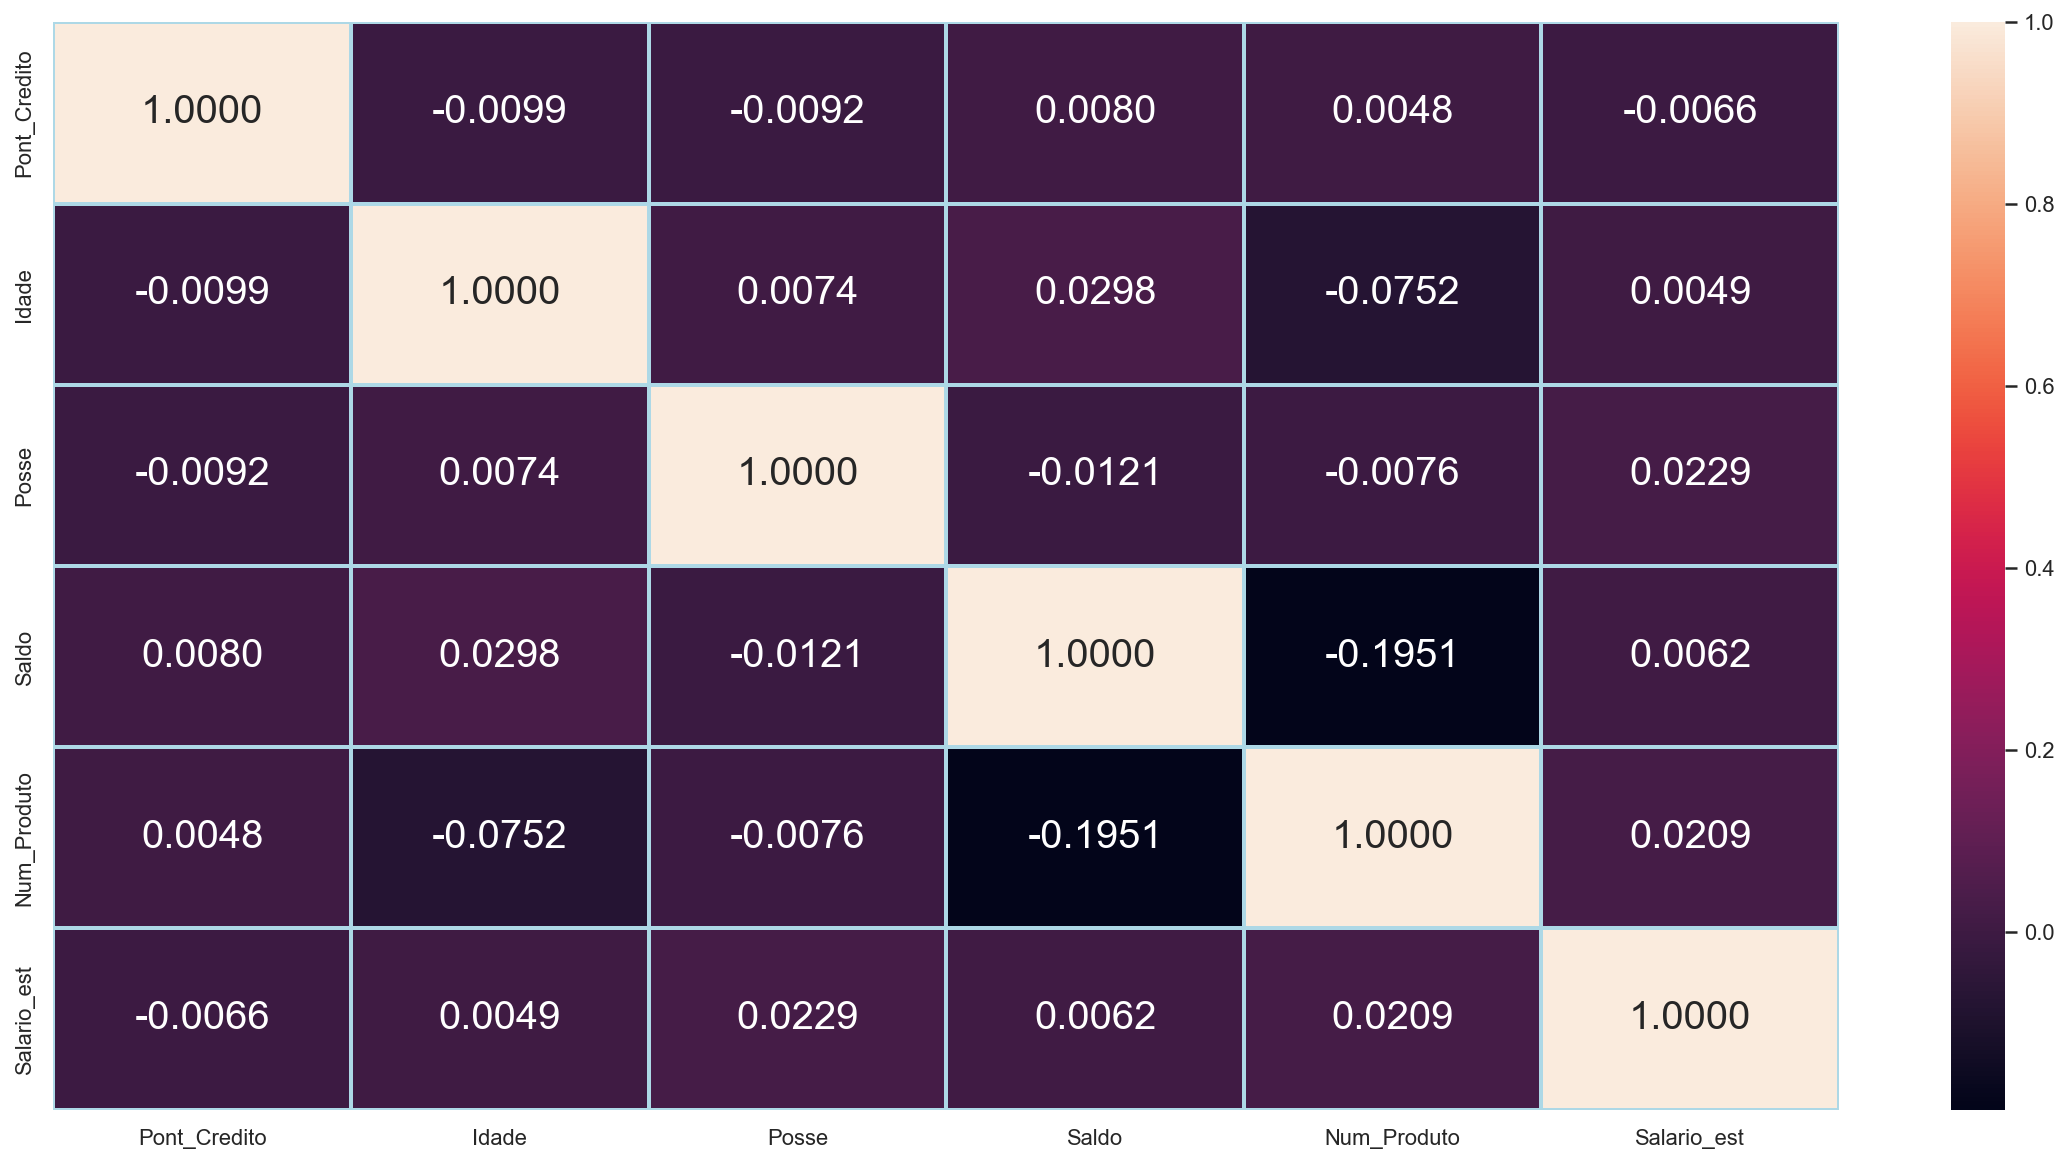

In [19]:
correlacao = churn_base_treino[["Pont_Credito","Idade","Posse","Saldo","Num_Produto","Salario_est"]].corr(method = "spearman" )

plt.figure(figsize=(20,10))
sns.heatmap(correlacao, annot=True, fmt=".4f", linewidths=2, linecolor="lightblue",annot_kws={'size': 20})
plt.show()

### Separando base X e Y

In [20]:
treino_base_X = churn_base_treino.iloc[:,:-1]
treino_base_Y = churn_base_treino.iloc[:,-1]
teste_base_X = churn_base_teste.iloc[:,:-1]
teste_base_Y= churn_base_teste.iloc[:,-1]

### Criando variáveis dummys

In [21]:
treino_base_X = pd.get_dummies(treino_base_X,columns=["Gênero","País"], prefix="Coluna")
teste_base_X = pd.get_dummies(teste_base_X,columns=["Gênero","País"], prefix="Coluna")

In [22]:
treino_base_X.head()

Pont_Credito  Idade  Posse       Saldo  Num_Produto  Tem_cart_cred  Cli_ativo  Salario_est  \
0           807     31      1 141069.1800            3              1          1  194257.1100   
1           689     47      1  93871.9500            3              1          0  156878.4200   
2           850     30      5 123210.5600            2              1          1  102180.2700   
3           563     42      6  99056.2200            2              1          0  154347.9500   
4           524     64      5      0.0000            1              1          0  136079.6400   

   Coluna_Female  Coluna_Male  Coluna_France  Coluna_Germany  Coluna_Spain  
0              1            0              0               1             0  
1              0            1              1               0             0  
2              0            1              0               1             0  
3              1            0              0               0             1  
4              1            0              0               0             1

#### Eliminando coluna de sexo masculino

In [23]:
treino_base_X = treino_base_X.drop(['Coluna_Male'], axis = 1)
teste_base_X = teste_base_X.drop(['Coluna_Male'], axis = 1)

In [24]:
treino_base_X.head()

Pont_Credito  Idade  Posse       Saldo  Num_Produto  Tem_cart_cred  Cli_ativo  Salario_est  \
0           807     31      1 141069.1800            3              1          1  194257.1100   
1           689     47      1  93871.9500            3              1          0  156878.4200   
2           850     30      5 123210.5600            2              1          1  102180.2700   
3           563     42      6  99056.2200            2              1          0  154347.9500   
4           524     64      5      0.0000            1              1          0  136079.6400   

   Coluna_Female  Coluna_France  Coluna_Germany  Coluna_Spain  
0              1              0               1             0  
1              0              1               0             0  
2              0              0               1             0  
3              1              0               0             1  
4              1              0               0             1

## Padronizando

In [25]:
sc = StandardScaler()
treino_base_X.iloc[:,[0,1,2,3,4,7]] = sc.fit_transform(treino_base_X.iloc[:,[0,1,2,3,4,7]])
teste_base_X.iloc[:,[0,1,2,3,4,7]] = sc.transform(teste_base_X.iloc[:,[0,1,2,3,4,7]])

In [26]:
treino_base_X.head()

Pont_Credito   Idade   Posse   Saldo  Num_Produto  Tem_cart_cred  Cli_ativo  Salario_est  \
0        1.6143 -0.9416 -1.3987  0.9733       2.2211              1          1       1.5872   
1        0.4097  0.6028 -1.3987  0.1955       2.2211              1          0       0.9487   
2        2.0532 -1.0381 -0.0166  0.6790       0.7301              1          1       0.0142   
3       -0.8764  0.1202  0.3289  0.2809       0.7301              1          0       0.9054   
4       -1.2745  2.2436 -0.0166 -1.3516      -0.7609              1          0       0.5933   

   Coluna_Female  Coluna_France  Coluna_Germany  Coluna_Spain  
0              1              0               1             0  
1              0              1               0             0  
2              0              0               1             0  
3              1              0               0             1  
4              1              0               0             1

# Aplicando Modelos de Machine Learning

## Naive Bayes

In [27]:
## Predição
predict_NB = cross_val_predict(GaussianNB(), treino_base_X, treino_base_Y, cv = 5)

## Métricas
print("========================================================")
print("===================    Métricas    =====================")
print("========================================================")
print((classification_report(treino_base_Y, predict_NB)))
print("========================================================")

===================    Métricas    =====================
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1425
           1       0.72      0.68      0.70      1426

    accuracy                           0.70      2851
   macro avg       0.70      0.70      0.70      2851
weighted avg       0.70      0.70      0.70      2851



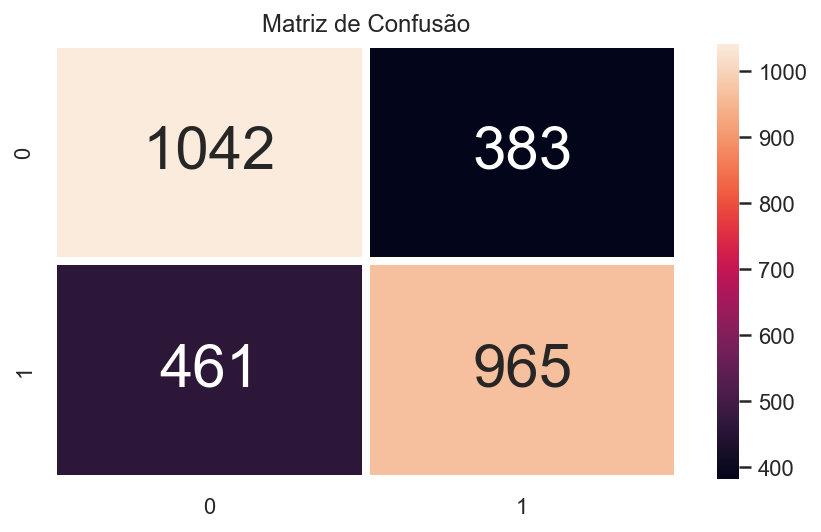

In [28]:
## Matriz de Confusão
cm = confusion_matrix(treino_base_Y, predict_NB)

plt.figure(figsize=(7,4))
plot = sns.heatmap(cm,annot=True,fmt=".0f", linewidths=4,annot_kws={'size': 30})
plot.set_title("Matriz de Confusão")
plt.show()


## Random Forest

In [29]:
## Predição
predict_RF = cross_val_predict(RandomForestClassifier(), treino_base_X, treino_base_Y, cv = 5)

## Métricas
print("========================================================")
print("===================    Métricas    =====================")
print("========================================================")
print((classification_report(treino_base_Y, predict_RF)))
print("========================================================")

===================    Métricas    =====================
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1425
           1       0.77      0.74      0.75      1426

    accuracy                           0.76      2851
   macro avg       0.76      0.76      0.76      2851
weighted avg       0.76      0.76      0.76      2851



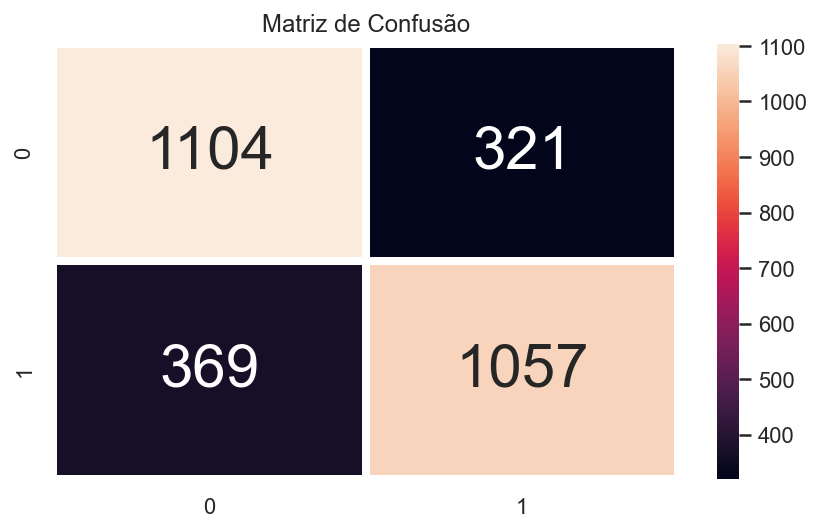

In [30]:
## Matriz de Confusão
cm = confusion_matrix(treino_base_Y, predict_RF)

plt.figure(figsize=(7,4))
plot = sns.heatmap(cm,annot=True,fmt=".0f", linewidths=4,annot_kws={'size': 30})
plot.set_title("Matriz de Confusão")
plt.show()

## KNN

In [31]:
## Predição
predict_KNN = cross_val_predict(KNeighborsClassifier(), treino_base_X, treino_base_Y, cv = 5)

## Métricas 
print("========================================================")
print("===================    Métricas    =====================")
print("========================================================")
print((classification_report(treino_base_Y, predict_KNN)))
print("========================================================")

===================    Métricas    =====================
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1425
           1       0.74      0.71      0.72      1426

    accuracy                           0.73      2851
   macro avg       0.73      0.73      0.73      2851
weighted avg       0.73      0.73      0.73      2851



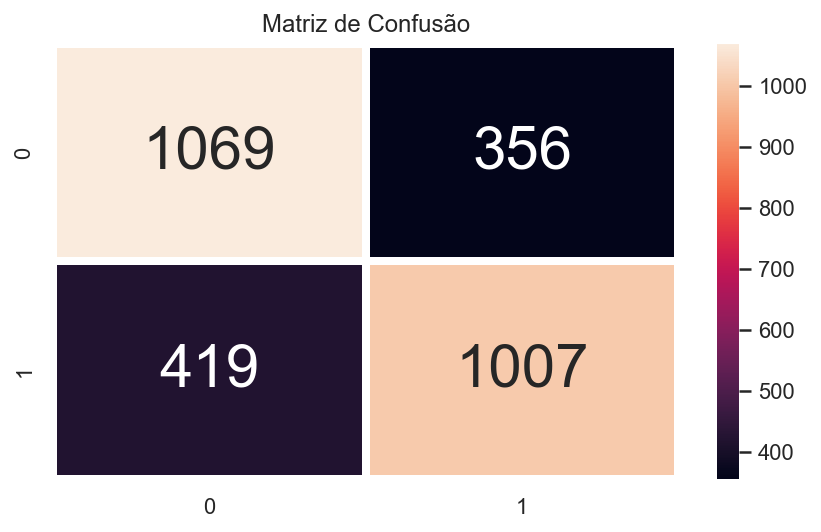

In [32]:
## Matriz de Confusão
cm = confusion_matrix(treino_base_Y, predict_KNN)

plt.figure(figsize=(7,4))
plot = sns.heatmap(cm,annot=True,fmt=".0f", linewidths=4,annot_kws={'size': 30})
plot.set_title("Matriz de Confusão")
plt.show()

## XGBoost

In [33]:
## Predição
predict_XGB = cross_val_predict(XGBClassifier(), treino_base_X, treino_base_Y, cv = 5)

## Métricas 
print("========================================================")
print("===================    Métricas    =====================")
print("========================================================")
print((classification_report(treino_base_Y, predict_XGB)))
print("========================================================")

===================    Métricas    =====================
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1425
           1       0.76      0.74      0.75      1426

    accuracy                           0.76      2851
   macro avg       0.76      0.76      0.76      2851
weighted avg       0.76      0.76      0.76      2851



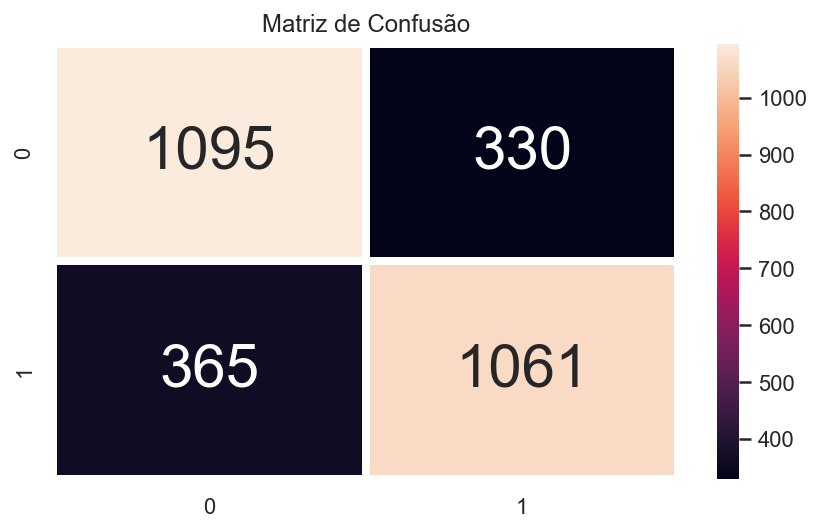

In [34]:
## Matriz de Confusão
cm = confusion_matrix(treino_base_Y, predict_XGB)

plt.figure(figsize=(7,4))
plot = sns.heatmap(cm,annot=True,fmt=".0f", linewidths=4,annot_kws={'size': 30})
plot.set_title("Matriz de Confusão")
plt.show()

# Aprimorando 

In [35]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'max_features': [3,5,4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 10, 12,15],
    'n_estimators': [50, 100, 150, 300]
}



In [46]:
predict_RF

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [ ]:
grade = GridSearchCV(RandomForestClassifier(),param_grid, cv=5)

grade.fit(treino_base_X,treino_base_Y)

In [40]:
modelo_final_RF = grade.best_estimator_

In [41]:
modelo_final_RF.fit(treino_base_X, treino_base_Y)

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=50)

In [42]:
y_pred = modelo_final_RF.predict(teste_base_X)

print("========================================================")
print("===================    Métricas    =====================")
print("========================================================")
print((classification_report(teste_base_Y, y_pred)))
print("========================================================")

===================    Métricas    =====================
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       612
           1       0.81      0.80      0.80       611

    accuracy                           0.80      1223
   macro avg       0.80      0.80      0.80      1223
weighted avg       0.80      0.80      0.80      1223



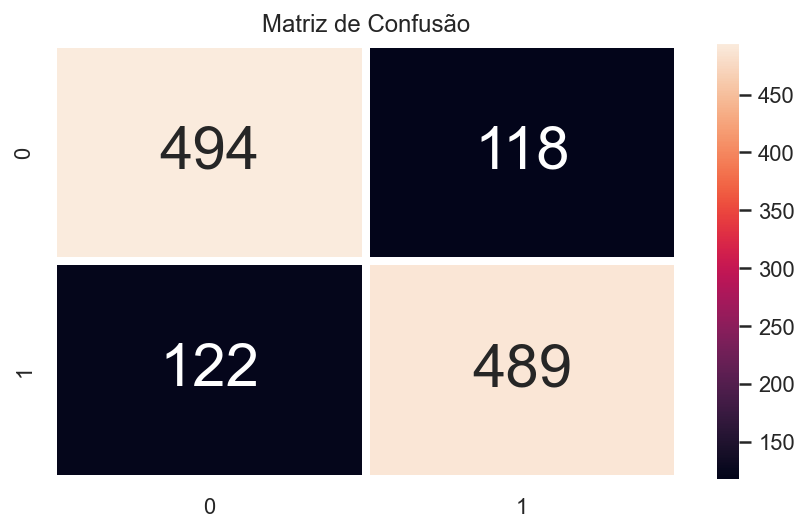

In [43]:
## Matriz de Confusão
cm = confusion_matrix(teste_base_Y, y_pred)

plt.figure(figsize=(7,4))
plot = sns.heatmap(cm,annot=True,fmt=".0f", linewidths=4,annot_kws={'size': 30})
plot.set_title("Matriz de Confusão")
plt.show()

## Curva ROC

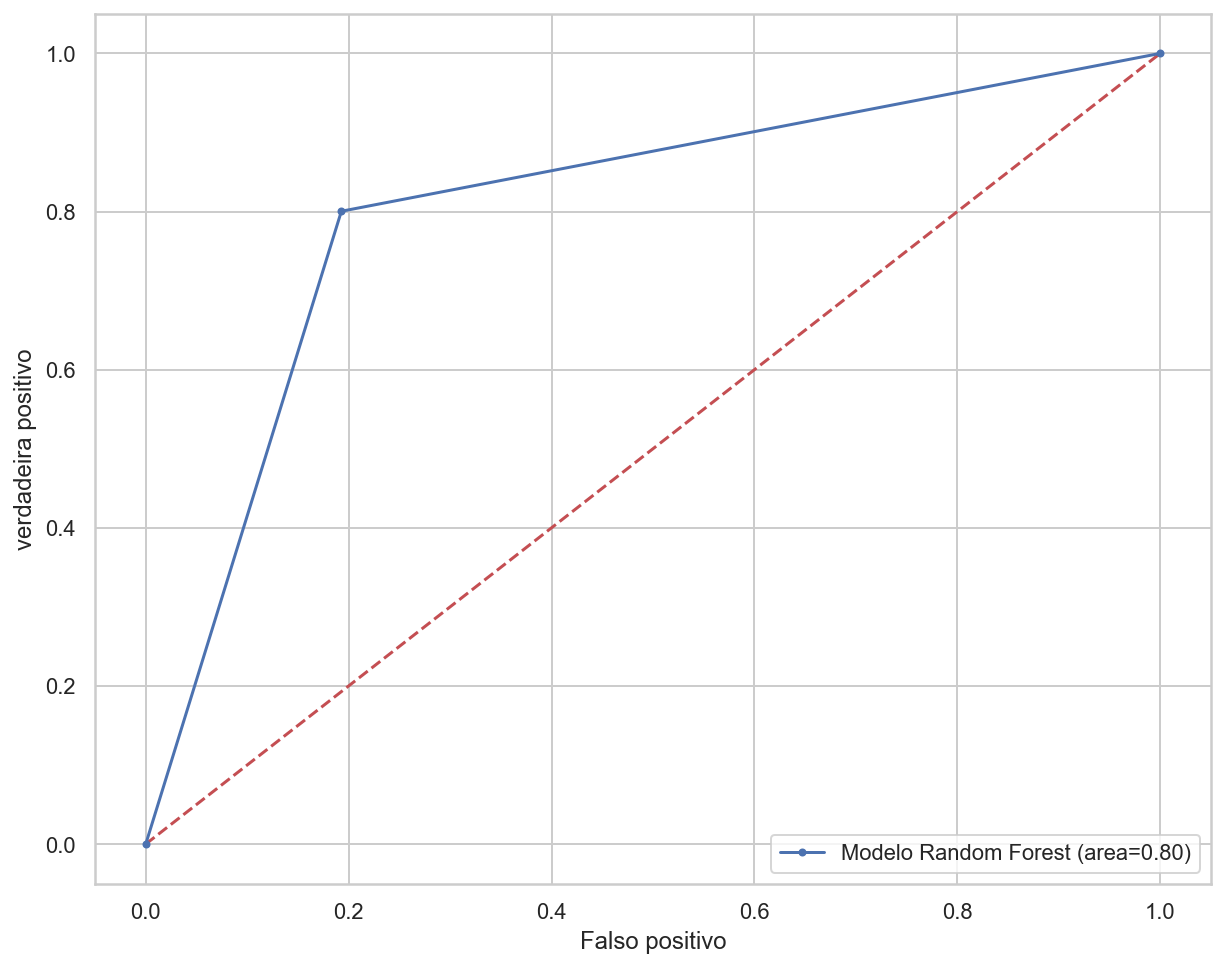

In [44]:
Log_ROC_auc= roc_auc_score(teste_base_Y,y_pred)
fpr,tpr, thresholds = roc_curve(teste_base_Y, y_pred)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1],'r--')
plt.xlabel('Falso positivo')
plt.ylabel('verdadeira positivo')
plt.plot(fpr,tpr, marker='.',label='Modelo Random Forest (area=%0.2f)'%Log_ROC_auc)
plt.legend(loc='lower right')
plt.show()

## Shap

In [84]:
shap.initjs()

In [85]:
explainer = shap.TreeExplainer(modelo_final_RF)

In [86]:
shap_values = explainer.shap_values(treino_base_X)

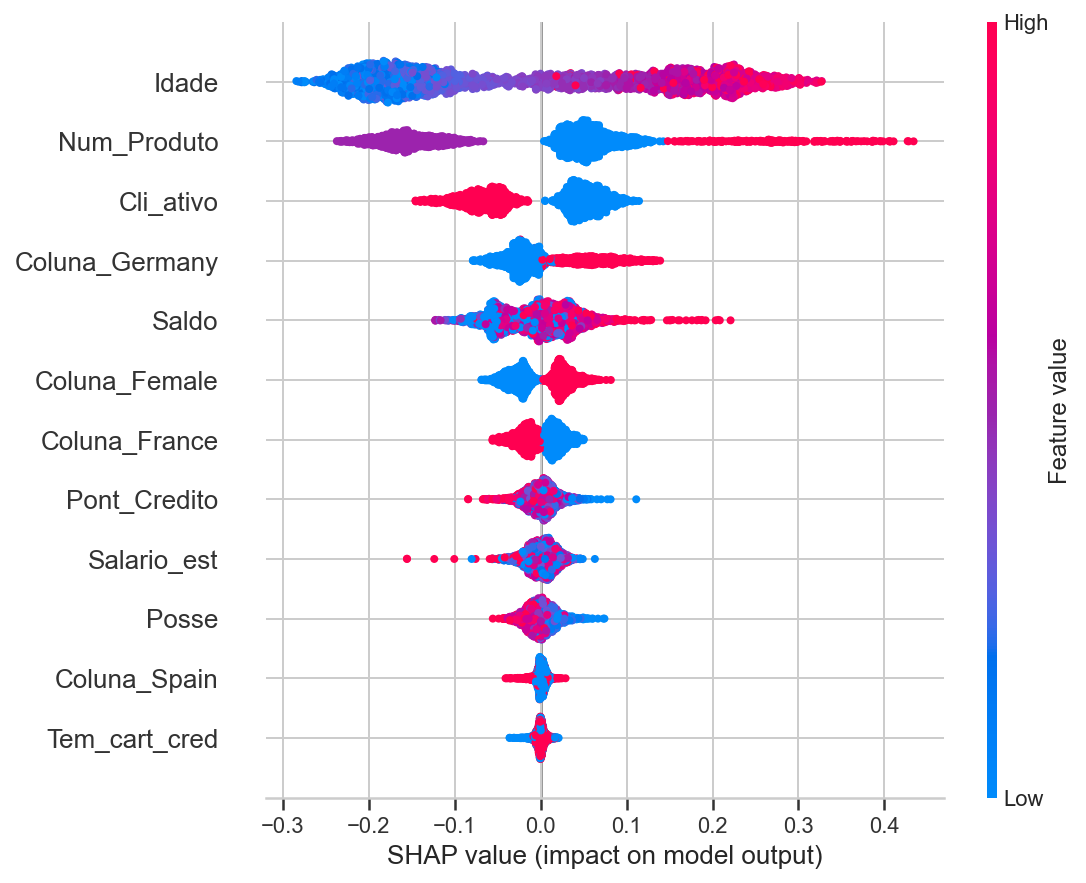

In [87]:
plt.figure(figsize=(20,10))
shap.summary_plot(shap_values[1],treino_base_X)

In [88]:
shap.force_plot(explainer.expected_value[1],shap_values[1][1,:],treino_base_X.iloc[1,:])

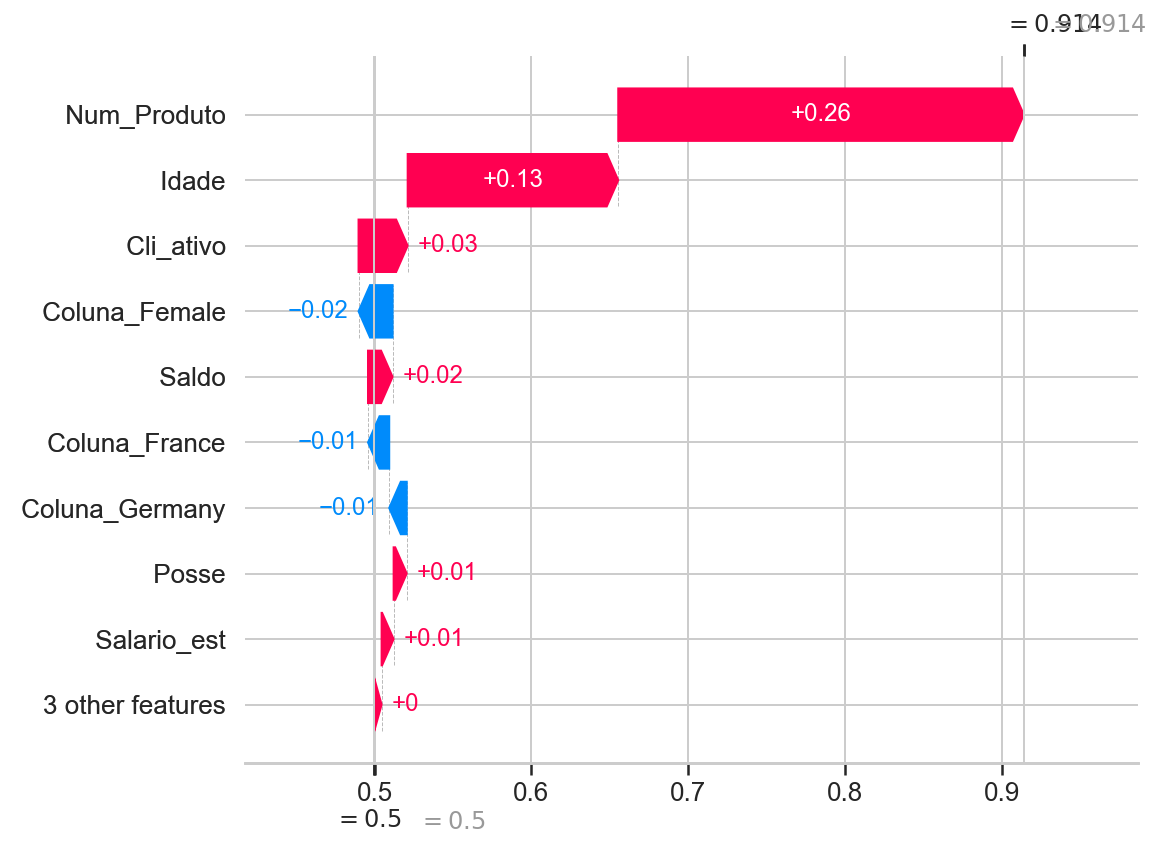

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1],shap_values[1][1,:],treino_base_X.iloc[1,:])